# **Semantic Analysis of Restaurant Reviews**

**Follow this Steps:**- https://github.com/Chandrakant817/Spam-Classifier-Using-NLP/blob/main/Spam_Classifier-master/Spam_Classifier_using_NLP.ipynb

In [1]:
# import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,precision_recall_curve,f1_score,classification_report

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
data = pd.read_csv("/content/Restaurant_Reviews.tsv",sep='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
data.shape

(1000, 2)

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [6]:
data.isnull().sum()

Review    0
Liked     0
dtype: int64

**EDA**

In [7]:
from wordcloud import WordCloud

In [8]:
data.groupby(["Review"]).count()

,Liked
Review,
!....THE OWNERS REALLY REALLY need to quit being soooooo cheap let them wrap my freaking sandwich in two papers not one!,1
"(It wasn't busy either) Also, the building was FREEZING cold.",1
(The bathroom is just next door and very nice.),1
* Both the Hot & Sour & the Egg Flower Soups were absolutely 5 Stars!,1
"- Really, really good rice, all the time.",1
...,...
very slow at seating even with reservation.,1
very tough and very short on flavor!,1
walked in and the place smelled like an old grease trap and only 2 others there eating.,1


In [9]:
sentences=data["Review"].tolist()

In [10]:
sentences

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Highly recommended.',
 'Waitress was a little slow in service.',
 'This place is not worth your time, let alone Vegas.',
 'did not like at all.

In [11]:
#convert the list into single string
sentences_as_a_string=" ".join(sentences)

In [12]:
sentences_as_a_string

'Wow... Loved this place. Crust is not good. Not tasty and the texture was just nasty. Stopped by during the late May bank holiday off Rick Steve recommendation and loved it. The selection on the menu was great and so were the prices. Now I am getting angry and I want my damn pho. Honeslty it didn\'t taste THAT fresh.) The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer. The fries were great too. A great touch. Service was very prompt. Would not go back. The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced. I tried the Cape Cod ravoli, chicken, with cranberry...mmmm! I was disgusted because I was pretty sure that was human hair. I was shocked because no signs indicate cash only. Highly recommended. Waitress was a little slow in service. This place is not worth your time, let alone Vegas. did not like at all. The Burrittos Blah! The food, amazing. Service is also cute. I could care l

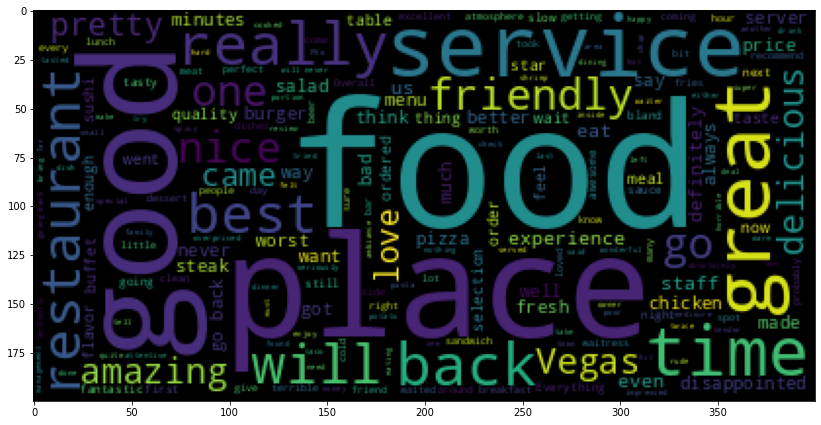

In [13]:
plt.figure(figsize=(14,14))
plt.imshow(WordCloud().generate(sentences_as_a_string))

#### **Import NLTK library**

###### Data Cleaning and Preprocessing

In [14]:
import re # regular expression
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [16]:
ps = PorterStemmer()
wordnet = WordNetLemmatizer()
corpus= [] 

In [17]:
for i in range(0,len(data)):
  review = re.sub("[^a-zA-Z]"," ",data["Review"][i])
  review = review.lower()
  review = review.split()
#implementing Stemming we can also implement Worednetlemmitizer
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #implementing Stemming 
  review = " ".join(review)
  print(review)
  corpus.append(review)

wow love place
crust good
tasti textur nasti
stop late may bank holiday rick steve recommend love
select menu great price
get angri want damn pho
honeslti tast fresh
potato like rubber could tell made ahead time kept warmer
fri great
great touch
servic prompt
would go back
cashier care ever say still end wayyy overpr
tri cape cod ravoli chicken cranberri mmmm
disgust pretti sure human hair
shock sign indic cash
highli recommend
waitress littl slow servic
place worth time let alon vega
like
burritto blah
food amaz
servic also cute
could care less interior beauti
perform
right red velvet cake ohhh stuff good
never brought salad ask
hole wall great mexican street taco friendli staff
took hour get food tabl restaur food luke warm sever run around like total overwhelm
worst salmon sashimi
also combo like burger fri beer decent deal
like final blow
found place accid could happier
seem like good quick place grab bite familiar pub food favor look elsewher
overal like place lot
redeem qualiti r

In [18]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [19]:
# Creating Bag of Words model

cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()

In [21]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
y = data.iloc[:,1].values

In [23]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [25]:
y.shape

(1000,)

In [26]:
cv.get_feature_names()

['absolut',
 'absolutley',
 'accid',
 'accommod',
 'accomod',
 'accordingli',
 'account',
 'ach',
 'acknowledg',
 'across',
 'actual',
 'ad',
 'afford',
 'afternoon',
 'ago',
 'ahead',
 'airlin',
 'airport',
 'ala',
 'albondiga',
 'allergi',
 'almond',
 'almost',
 'alon',
 'also',
 'although',
 'alway',
 'amaz',
 'ambianc',
 'ambienc',
 'amount',
 'ampl',
 'andddd',
 'angri',
 'annoy',
 'anoth',
 'anticip',
 'anymor',
 'anyon',
 'anyth',
 'anytim',
 'anyway',
 'apart',
 'apolog',
 'app',
 'appal',
 'appar',
 'appeal',
 'appet',
 'appetit',
 'appl',
 'approv',
 'area',
 'arepa',
 'aria',
 'around',
 'array',
 'arriv',
 'articl',
 'ask',
 'assur',
 'ate',
 'atmospher',
 'atroci',
 'attach',
 'attack',
 'attent',
 'attitud',
 'auju',
 'authent',
 'averag',
 'avocado',
 'avoid',
 'aw',
 'away',
 'awesom',
 'awkward',
 'awkwardli',
 'ayc',
 'az',
 'baba',
 'babi',
 'bachi',
 'back',
 'bacon',
 'bad',
 'bagel',
 'bakeri',
 'baklava',
 'ball',
 'bamboo',
 'banana',
 'bank',
 'bar',
 'bare',
 

In [27]:
len(cv.get_feature_names())

1500

In [28]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


**Train Test Split Model**

In [30]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [31]:
print("Shape of X train: ",X_train.shape)
print("Shape of X test: ",X_test.shape)
print("Shape of y train: ",y_train.shape)
print("Shape of y test: ",y_test.shape)

Shape of X train:  (800, 1500)
Shape of X test:  (200, 1500)
Shape of y train:  (800,)
Shape of y test:  (200,)


**Model Implementing**

In [32]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1])

In [37]:
# Confusion Matric

print(confusion_matrix(y_test,y_pred))

[[55 42]
 [12 91]]


In [39]:
# Model Accuracy

print(round(accuracy_score(y_test,y_pred)*100,2),"%")

73.0 %


In [40]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



Checking our Model

In [42]:
Review = "bad food"

input_data = [Review]
input_data = cv.transform(input_data).toarray()
input_pred = classifier.predict(input_data)

if input_pred[0]==1:
    print("Review is Positive")
else:
    print("Review is Negative")

Review is Negative
